In [1]:
import time
import threading
import matplotlib.pyplot as plt
%matplotlib inline
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
class Philosopher(threading.Thread):
    def __init__(self, name, both_forks):
        """
        both_forks = [1, 2]
        """
        super().__init__()
        self.name = name
        self.both_forks = both_forks #食事に必要なフォーク番号
        self.hold_forks = [] #現時点で持っているフォーク番号
        self.state = 0 
        self.time_series = {} #{state: time, }
        """
        self.state: 現在の状況
        0: hold noting(hungry)   
        1:pickup1, 
        2:pickup2(eating), 
        3:puts1, 
        4:puts2(thinking)
        """
        
    def do_fork(self, Forks):
        if self.state == 0:
            #######はじめにどちらのフォークを持つか##########
#             wait_fork = random.choice(self.both_forks) #ランダム
            wait_fork = self.both_forks[0] #左から取る
#             wait_fork = self.both_forks[1] #右から取る
            ###################################
        
            end_time = get_forks(wait_fork, Forks, self.hold_forks, self.name)
            self.state = 1

            return end_time
            
        elif self.state == 1:
            wait_fork = list(set(self.both_forks) - set(self.hold_forks))[0]

            end_time = get_forks(wait_fork, Forks, self.hold_forks, self.name)
            self.state = 2
            return end_time
            
        elif self.state == 2:
            #######始めにどちらのフォークを置くか##########
#             put_fork = random.choice(self.hold_forks) #ランダム
#             put_fork = self.both_forks[0] #左から置く
            put_fork = self.both_forks[1] #右から置く
            ###################################
            
            put_forks(put_fork, Forks, self.hold_forks, self.name)
            self.state = 3
            event.set()
            
        elif self.state == 3: #食事終了
            put_fork = self.hold_forks[0]
            put_forks(put_fork, Forks, self.hold_forks, self.name)
            event.set()
            self.state = 4
            
        
    def action(self, Forks, ss_time):
        
        for i in range(30):
            
            #self.state == 0:
            t = random.random() / 1000
            print("trial {}: {} stays hungry for {:.3f}msec.\n".format(i, self.name, t*1000))
            wait_time(t)
            self.time_series[str(i)+":hungry"]= time.time() - ss_time
            
            self.time_series[str(i)+":fork1"]= self.do_fork(Forks) - ss_time #fork1: フォーク1を持った時間

            #self.state == 1:
            self.time_series[str(i)+":fork2"]= self.do_fork(Forks) - ss_time #"fork2":フォーク2を持った時間
            
            #self.state == 2:
            t = random.random()  / 1000
            print("{} starts eating for {:.3f}msec.\n".format(self.name, t*1000))
            wait_time(t)
            self.time_series[str(i)+":eating"]= time.time() - ss_time
            self.do_fork(Forks) #フォークを置く(1st)

            #self.state == 3:
            self.do_fork(Forks) #フォークを置く(2nd)
                
            #self.state == 4:
            t = random.random()  / 1000
            print("{} starts thinking for {:.3f}msec.\n".format(self.name, t*1000))
            wait_time(t)
            self.time_series[str(i)+":thinking"]= time.time() - ss_time
            self.state = 0
            
            

In [3]:
def wait_time(t):
    
    time.sleep(t)

In [4]:
def put_forks(fork_num, Forks_class, hold_forks, name):
    Forks_class.change_state(fork_num)
    print("{} puts {}.".format(name,fork_num))
#     print("hold_forks", hold_forks)
    hold_forks.remove(fork_num)
    event.set()

In [5]:
def get_forks(fork_num, Forks_class, hold_forks, name):
    start_time = time.time()
    state = True
    while not Forks_class.get_fork_state(fork_num):
        event.wait()
    end_time = time.time()

        
    Forks_class.change_state(fork_num) #使用中に変更
    hold_forks.append(fork_num)
    need_time = end_time - start_time
    print("{} picks up {}. It takes {:.3f}msec.\n".format(name, fork_num, need_time*1000))
    return end_time

In [6]:
class Forks:
    def __init__(self, forks_num):
        self.fork_num_dic = {}
        for i in range(forks_num):
            self.fork_num_dic[i] = True
        
    def get_fork_state(self, fork_num):
        return self.fork_num_dic[fork_num] #True：空き、False:使用中
    
    def change_state(self, fork_num):
        if self.fork_num_dic[fork_num]: #TrueならFlaseへ
            self.fork_num_dic[fork_num] = False
        else:
            self.fork_num_dic[fork_num] = True
        

In [7]:
threading.enumerate()

[<_MainThread(MainThread, started 8665976320)>,
 <Thread(Thread-2, started daemon 13063675904)>,
 <Heartbeat(Thread-3, started daemon 13080465408)>,
 <HistorySavingThread(IPythonHistorySavingThread, started 13098328064)>,
 <ParentPollerUnix(Thread-1, started daemon 13115666432)>]

In [12]:

fork = Forks(5)
phi_a = Philosopher("a", [0, 1])
phi_b = Philosopher("b", [1, 2])
phi_c = Philosopher("c", [2, 3])
phi_d = Philosopher("d", [3, 4])
phi_e = Philosopher("e", [4, 1])

In [13]:
event = threading.Event()


In [14]:
start_time = time.time()
random.seed(0)
thread_a = threading.Thread(target= phi_a.action, args=(fork, start_time))
thread_b = threading.Thread(target= phi_b.action, args=(fork, start_time))
thread_c = threading.Thread(target= phi_c.action, args=(fork, start_time))
thread_d = threading.Thread(target= phi_d.action, args=(fork, start_time))
thread_e = threading.Thread(target= phi_e.action, args=(fork, start_time))

thread_a.start()
thread_b.start()
thread_c.start()
thread_d.start()
thread_e.start()

thread_a.join(5)
thread_b.join(5)
thread_c.join(5)
thread_d.join(5)
thread_e.join(5)

end_time = time.time()


for phi in [phi_a, phi_b, ohi_c, phi_d, phi_e]:
    if phi.state == 1:
        phi.time_series["end:fork1"] = end_time - start_time
        
    else:
        phi.time_series["end"] = end_time - start_time
    

trial 0: a stays hungry for 0.844msec.

trial 0: b stays hungry for 0.758msec.
trial 0: c stays hungry for 0.421msec.


trial 0: d stays hungry for 0.259msec.

trial 0: e stays hungry for 0.511msec.
a picks up 0. It takes 0.002msec.

a picks up 1. It takes 0.001msec.

a starts eating for 0.405msec.


c picks up 2. It takes 0.001msec.
d picks up 3. It takes 0.002msec.

d picks up 4. It takes 0.001msec.

d starts eating for 0.784msec.


a puts 1.
a puts 0.
a starts thinking for 0.303msec.

d puts 4.trial 1: a stays hungry for 0.477msec.


e picks up 4. It takes 6.866msec.

e picks up 1. It takes 0.001msec.

e starts eating for 0.583msec.

a picks up 0. It takes 0.001msec.

d puts 3.
e puts 1.
b picks up 1. It takes 8.843msec.

d starts thinking for 0.908msec.

e puts 4.
c picks up 3. It takes 9.489msec.

c starts eating for 0.505msec.

trial 1: d stays hungry for 0.282msec.

c puts 3.
c puts 2.
d picks up 3. It takes 0.001msec.

d picks up 4. It takes 0.001msec.

d starts eating for 0.75

In [34]:
threading.enumerate()

[<_MainThread(MainThread, started 8668368384)>,
 <Thread(Thread-2, started daemon 13067513856)>,
 <Heartbeat(Thread-3, started daemon 13084303360)>,
 <HistorySavingThread(IPythonHistorySavingThread, started 13102166016)>,
 <ParentPollerUnix(Thread-1, started daemon 13119516672)>,
 <Thread(Thread-13, started 13136306176)>,
 <Thread(Thread-14, started 13153095680)>,
 <Thread(Thread-15, started 13169885184)>,
 <Thread(Thread-19, started 13186674688)>,
 <Thread(Thread-20, started 13203464192)>,
 <Thread(Thread-21, started 13220253696)>,
 <Thread(Thread-25, started 13237043200)>,
 <Thread(Thread-26, started 13253832704)>,
 <Thread(Thread-27, started 13270622208)>]

In [46]:
for phi in [phi_a, phi_b, phi_c, phi_d, phi_e]:
    phi.time_series.pop("end:fork1")

In [47]:
all_times = []

for phi in [phi_a, phi_b, phi_c, phi_d, phi_e]:
    if phi.state == 1:
        phi.time_series["end:fork2"] = end_time - start_time
        
    else:
        phi.time_series["end"] = end_time - start_time
        
    all_times.append(phi.time_series)
    
index = ["a", "b", "c", "d", "e"]

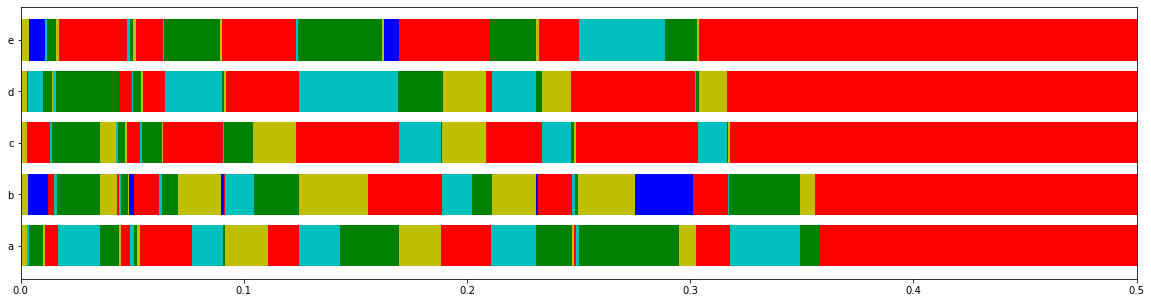

In [49]:
fig, ax = plt.subplots(figsize=(20, 5))
phi_num = len(all_times)
left_data = np.zeros(phi_num)

label_color = {"hungry": 'y', "fork1":'b', "fork2":'r', "eating":'c', "thinking":'g', "end":"k"}


time_series = all_times[np.array([len(ts) for ts in all_times]).argmax()]

for key, value in time_series.items():
    label = key.split(":")[-1]
#     print(label)
    
    try:
        times = []
        for i in range(phi_num):
            times.append(all_times[i][key])
        times = np.array(times)     
        

    except KeyError:
        times = []
        for i in range(phi_num):
            if key in all_times[i]:
                times.append(all_times[i][key])
            else:
                times.append(left_data[i])
        times = np.array(times)
       
    draw_times = times- left_data
    bar_list = ax.barh(index, draw_times, left=left_data, label=label, color = label_color[label])
    left_data =  times                 

    ax.set_xlim([0, 0.5])

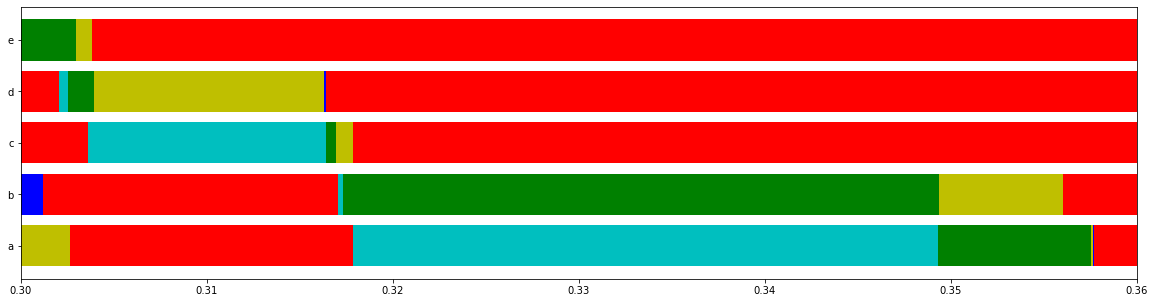

In [50]:
#deadlockが起きる前後を拡大
fig, ax = plt.subplots(figsize=(20, 5))
phi_num = len(all_times)
left_data = np.zeros(phi_num)

label_color = {"hungry": 'y', "fork1":'b', "fork2":'r', "eating":'c', "thinking":'g', "end":"k"}


time_series = all_times[np.array([len(ts) for ts in all_times]).argmax()]

for key, value in time_series.items():
    label = key.split(":")[-1]
#     print(label)
    
    try:
        times = []
        for i in range(phi_num):
            times.append(all_times[i][key])
        times = np.array(times)     
        

    except KeyError:
        times = []
        for i in range(phi_num):
            if key in all_times[i]:
                times.append(all_times[i][key])
            else:
                times.append(left_data[i])
        times = np.array(times)
       
    draw_times = times- left_data
    bar_list = ax.barh(index, draw_times, left=left_data, label=label, color = label_color[label])
    left_data =  times                 

    ax.set_xlim([0.3, 0.36])

deadlockがE→D→C→B→Aの順に起こっている。

deadlockの改善策としては、フォークを左右のどちらから持つのか、また左右のどちらから置くのかをランダムにする、または、左から動作する人と右から動作する人を混在させれば良いのではないか。以下、改良したPhilosopherクラス。

In [2]:
class Philosopher(threading.Thread):
    def __init__(self, name, both_forks):
        """
        both_forks = [1, 2]
        """
        super().__init__()
        self.name = name
        self.both_forks = both_forks #食事に必要なフォーク番号
        self.hold_forks = [] #現時点で持っているフォーク番号
        self.state = 0 
        self.time_series = {} #{state: time, }
        """
        self.state: 現在の状況
        0: hold noting(hungry)   
        1:pickup1, 
        2:pickup2(eating), 
        3:puts1, 
        4:puts2(thinking)
        """
        
    def do_fork(self, Forks):
        if self.state == 0:
            #######はじめにどちらのフォークを持つか##########
            wait_fork = random.choice(self.both_forks) #ランダム ##########変更点##########
#             wait_fork = self.both_forks[0] #左から取る
#             wait_fork = self.both_forks[1] #右から取る
            ###################################
        
            end_time = get_forks(wait_fork, Forks, self.hold_forks, self.name)
            self.state = 1

            return end_time
            
        elif self.state == 1:
            wait_fork = list(set(self.both_forks) - set(self.hold_forks))[0]

            end_time = get_forks(wait_fork, Forks, self.hold_forks, self.name)
            self.state = 2
            return end_time
            
        elif self.state == 2:
            #######始めにどちらのフォークを置くか##########
            put_fork = random.choice(self.hold_forks) #ランダム ##########変更点##########
#             put_fork = self.both_forks[0] #左から置く
#             put_fork = self.both_forks[1] #右から置く
            ###################################
            
            put_forks(put_fork, Forks, self.hold_forks, self.name)
            self.state = 3
            event.set()
            
        elif self.state == 3: #食事終了
            put_fork = self.hold_forks[0]
            put_forks(put_fork, Forks, self.hold_forks, self.name)
            event.set()
            self.state = 4
            
        
    def action(self, Forks, ss_time):
        
        for i in range(30):
            
            #self.state == 0:
            t = random.random() / 1000
            print("trial {}: {} stays hungry for {:.3f}msec.\n".format(i, self.name, t*1000))
            wait_time(t)
            self.time_series[str(i)+":hungry"]= time.time() - ss_time
            
            self.time_series[str(i)+":fork1"]= self.do_fork(Forks) - ss_time #fork1: フォーク1を持った時間

            #self.state == 1:
            self.time_series[str(i)+":fork2"]= self.do_fork(Forks) - ss_time #"fork2":フォーク2を持った時間
            
            #self.state == 2:
            t = random.random()  / 1000
            print("{} starts eating for {:.3f}msec.\n".format(self.name, t*1000))
            wait_time(t)
            self.time_series[str(i)+":eating"]= time.time() - ss_time
            self.do_fork(Forks) #フォークを置く(1st)

            #self.state == 3:
            self.do_fork(Forks) #フォークを置く(2nd)
                
            #self.state == 4:
            t = random.random()  / 1000
            print("{} starts thinking for {:.3f}msec.\n".format(self.name, t*1000))
            wait_time(t)
            self.time_series[str(i)+":thinking"]= time.time() - ss_time
            self.state = 0
            
            